# Final Project Big Data - Sowmya Thogiti

In [0]:
import urllib.request
StringInURL = "https://raw.githubusercontent.com/sowmyathogiti/Sowmya-FinalProject-BigData/main/TheLegendOfSleepyHollow.txt"
urllib.request.urlretrieve(StringInURL, "/tmp/Hollow.txt")
dbutils.fs.mv("file:/tmp/Hollow.txt", "dbfs:/data/Hollow.txt")

Out[6]: True

In [0]:
nServers = 5;
HollowRawRDD= sc.textFile("dbfs:/data/Hollow.txt",nServers)

In [0]:
print(type(HollowRawRDD));

<class 'pyspark.rdd.RDD'>

In [0]:
inHollowRDD = HollowRawRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# clean out punctuation 
# Filter out stopwords
# then map() to intermediate key-value pairs

# clean out punctuation
import re
cleanHollowRDD = inHollowRDD.map(lambda alpha : re.sub( r'[^a-zA-Z]' , '' , alpha))

# filter out stopwords
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()

cleanHollowRDD.filter(lambda w : w not in stopwords)

IKVHollowRDD = cleanHollowRDD.map(lambda word : (word, 5))

In [0]:
resultsRDD  = IKVHollowRDD.reduceByKey(lambda res, value: res + value )

In [0]:
results = resultsRDD.collect()

In [0]:
print(results)

[('of', 3615), ('washington', 20), ('', 1515), ('is', 355), ('at', 485), ('no', 160), ('cost', 15), ('away', 75), ('license', 75), ('release', 5), ('october', 5), ('language', 10), ('character', 15), ('utf', 5), ('among', 70), ('land', 30), ('drowsy', 25), ('head', 85), ('was', 1015), ('before', 85), ('eye', 40), ('gay', 20), ('castles', 5), ('forever', 10), ('one', 230), ('spacious', 10), ('coves', 5), ('hudson', 30), ('dutch', 65), ('town', 15), ('greensburgh', 5), ('tarry', 10), ('former', 20), ('their', 255), ('to', 1640), ('on', 495), ('fact', 30), ('authentic', 10), ('two', 45), ('valley', 30), ('rather', 30), ('high', 40), ('hills', 25), ('whistle', 20), ('quail', 10), ('shades', 15), ('noontime', 5), ('all', 350), ('if', 180), ('should', 50), ('none', 5), ('promising', 5), ('than', 95), ('place', 50), ('peculiar', 10), ('has', 45), ('rustic', 30), ('neighboring', 30), ('bewitched', 5), ('early', 10), ('an', 205), ('chief', 15), ('minds', 10), ('people', 35), ('visions', 5), ('frequently', 10), ('see', 40), ('stars', 15), ('meteors', 5), ('her', 115), ('gambols', 5), ('dominant', 10), ('enchanted', 5), ('powers', 30), ('horseback', 10), ('said', 20), ('carried', 40), ('anon', 10), ('extend', 5), ('especially', 20), ('have', 220), ('floating', 10), ('buried', 10), ('rides', 5), ('nightly', 20), ('quest', 10), ('sometimes', 30), ('passes', 5), ('belated', 5), ('back', 25), ('such', 100), ('furnished', 5), ('shadows', 10), ('remarkable', 5), ('visionary', 5), ('inhale', 5), ('grow', 5), ('population', 10), ('while', 55), ('migration', 5), ('improvement', 5), ('making', 5), ('changes', 5), ('sweeps', 5), ('though', 40), ('vegetating', 5), ('american', 10), ('worthy', 10), ('crane', 40), ('sojourned', 5), ('tarried', 5), ('purpose', 20), ('instructing', 10), ('connecticut', 15), ('pioneers', 5), ('mind', 50), ('legions', 10), ('frontier', 5), ('mile', 15), ('sleeves', 5), ('hung', 35), ('ears', 15), ('green', 30), ('eyes', 50), ('looked', 30), ('weathercock', 5), ('perched', 5), ('fluttering', 5), ('earth', 20), ('building', 5), ('copybooks', 5), ('twisted', 5), ('window', 30), ('would', 130), ('embarrassment', 5), ('getting', 5), ('mystery', 5), ('lonely', 15), ('knowledge', 10), ('conscientious', 5), ('golden', 20), ('subjects', 5), ('severity', 5), ('burden', 10), ('off', 45), ('mere', 25), ('claims', 5), ('wrongheaded', 5), ('sulked', 5), ('never', 25), ('inflicted', 10), ('following', 25), ('companion', 25), ('sisters', 5), ('arising', 5), ('help', 35), ('maintenance', 5), ('custom', 10), ('successively', 5), ('thus', 30), ('pasture', 5), ('aside', 10), ('empire', 5), ('whilom', 5), ('hold', 15), ('rock', 10), ('singingmaster', 10), ('folks', 15), ('sundays', 10), ('front', 10), ('gallery', 5), ('chosen', 5), ('resounded', 5), ('opposite', 25), ('sunday', 25), ('morning', 15), ('divers', 10), ('pedagogue', 30), ('nothing', 10), ('female', 5), ('circle', 5), ('superior', 15), ('taste', 5), ('accomplishments', 5), ('inferior', 5), ('appearance', 35), ('therefore', 35), ('overran', 5), ('satisfaction', 5), ('england', 10), ('firmly', 5), ('digesting', 5), ('gross', 10), ('storm', 10), ('dreary', 5), ('sudden', 10), ('frightened', 5), ('sparkled', 5), ('darkest', 5), ('poor', 20), ('ready', 30), ('struck', 5), ('spirits', 15), ('tunes', 10), ('distant', 25), ('fearful', 35), ('pleasure', 10), ('ghosts', 35), ('galloping', 25), ('omens', 5), ('prevailed', 5), ('speculations', 5), ('comets', 5), ('shooting', 5), ('dearly', 5), ('shapes', 10), ('look', 30), ('waste', 10), ('shrink', 5), ('crust', 10), ('dread', 5), ('behold', 5), ('dismay', 5), ('scourings', 5), ('put', 30), ('perplexity', 5), ('assembled', 10), ('katrina', 25), ('lass', 5), ('ripe', 5), ('rosycheeked', 5), ('fathers', 5), ('charms', 15), ('saardam', 5), ('ankle', 5), ('paternal', 5), ('mansion', 15), ('baltus', 10), ('true', 25), ('sent', 15), ('thoughts', 10), ('beyond', 20), ('everything', 20), ('wealth', 10), ('style', 15), ('stronghold', 5), ('situated', 

In [0]:
sleepy = """
In the bosom of one of those spacious coves which indent the eastern
shore of the Hudson, at that broad expansion of the river denominated
by the ancient Dutch navigators the Tappan Zee, and where they always
prudently shortened sail and implored the protection of St. Nicholas
when they crossed, there lies a small market town or rural port, which
by some is called Greensburgh, but which is more generally and properly
known by the name of Tarry Town. This name was given, we are told, in
former days, by the good housewives of the adjacent country, from the
inveterate propensity of their husbands to linger about the village
tavern on market days. Be that as it may, I do not vouch for the fact,
but merely advert to it, for the sake of being precise and authentic.
Not far from this village, perhaps about two miles, there is a little
valley or rather lap of land among high hills, which is one of the
quietest places in the whole world. A small brook glides through it,
with just murmur enough to lull one to repose; and the occasional
whistle of a quail or tapping of a woodpecker is almost the only sound
that ever breaks in upon the uniform tranquillity.

I recollect that, when a stripling, my first exploit in
squirrel-shooting was in a grove of tall walnut-trees that shades one
side of the valley. I had wandered into it at noontime, when all nature
is peculiarly quiet, and was startled by the roar of my own gun, as it
broke the Sabbath stillness around and was prolonged and reverberated
by the angry echoes. If ever I should wish for a retreat whither I might
steal from the world and its distractions, and dream quietly away the
remnant of a troubled life, I know of none more promising than this
little valley.

"""

In [0]:
list= [sleepy]
messyHollowRDD = sc.parallelize(list)

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopHollowwords = remover.getStopWords()
print(stopHollowwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "we've", "you've", "they've", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't", "can't", "couldn't", 'cannot', 'could', "here's", "how's", "let's", 'ought', "that's", "there's", "what's", "when's", "where's", "who's", "why's", 'would']

In [0]:
messyWordsRDD = messyHollowRDD.flatMap(lambda line: line.strip().split(" "))
nonStopRDD = messyWordsRDD.filter(lambda word: word not in stopwords)
nonStopRDD.collect()


Out[17]: ['In',
 'bosom',
 'one',
 'spacious',
 'coves',
 'indent',
 'eastern\nshore',
 'Hudson,',
 'broad',
 'expansion',
 'river',
 'denominated\nby',
 'ancient',
 'Dutch',
 'navigators',
 'Tappan',
 'Zee,',
 'always\nprudently',
 'shortened',
 'sail',
 'implored',
 'protection',
 'St.',
 'Nicholas\nwhen',
 'crossed,',
 'lies',
 'small',
 'market',
 'town',
 'rural',
 'port,',
 'which\nby',
 'called',
 'Greensburgh,',
 'generally',
 'properly\nknown',
 'name',
 'Tarry',
 'Town.',
 'This',
 'name',
 'given,',
 'told,',
 'in\nformer',
 'days,',
 'good',
 'housewives',
 'adjacent',
 'country,',
 'the\ninveterate',
 'propensity',
 'husbands',
 'linger',
 'village\ntavern',
 'market',
 'days.',
 'Be',
 'may,',
 'I',
 'vouch',
 'fact,\nbut',
 'merely',
 'advert',
 'it,',
 'sake',
 'precise',
 'authentic.\nNot',
 'far',
 'village,',
 'perhaps',
 'two',
 'miles,',
 'little\nvalley',
 'rather',
 'lap',
 'land',
 'among',
 'high',
 'hills,',
 'one',
 'the\nquietest',
 'places',
 'whole',
 'world.',
 'A',
 'small',
 'brook',
 'glides',
 'it,\nwith',
 'murmur',
 'enough',
 'lull',
 'one',
 'repose;',
 'occasional\nwhistle',
 'quail',
 'tapping',
 'woodpecker',
 'almost',
 'sound\nthat',
 'ever',
 'breaks',
 'upon',
 'uniform',
 'tranquillity.\n\nI',
 'recollect',
 'that,',
 'stripling,',
 'first',
 'exploit',
 'in\nsquirrel-shooting',
 'grove',
 'tall',
 'walnut-trees',
 'shades',
 'one\nside',
 'valley.',
 'I',
 'wandered',
 'noontime,',
 'nature\nis',
 'peculiarly',
 'quiet,',
 'startled',
 'roar',
 'gun,',
 'it\nbroke',
 'Sabbath',
 'stillness',
 'around',
 'prolonged',
 'reverberated\nby',
 'angry',
 'echoes.',
 'If',
 'ever',
 'I',
 'wish',
 'retreat',
 'whither',
 'I',
 'might\nsteal',
 'world',
 'distractions,',
 'dream',
 'quietly',
 'away',
 'the\nremnant',
 'troubled',
 'life,',
 'I',
 'know',
 'none',
 'promising',
 'this\nlittle',
 'valley.']

In [0]:
# learn how to chart results (from PySpark results of collect())
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Get a list of words
Sampletext = "A gay castles in a cloud that a summer sky cloud"
word_list = Sampletext.lower().split()


In [0]:
# Call the Counter most_common() function to get list of tuples 
tuples = Counter(word_list).most_common()
print(tuples)

[('a', 3), ('cloud', 2), ('gay', 1), ('castles', 1), ('in', 1), ('that', 1), ('summer', 1), ('sky', 1)]

In [0]:
# prepare chart information
source = 'Sleepy Hollow story'
title = 'Top Words in ' + source
xlabel = 'word'
ylabel = 'count'

In [0]:
# create Pandas dataframe from list of tuples
pd.DataFrame.from_records(tuples, columns = [xlabel,ylabel])
df = pd.DataFrame.from_records(tuples, columns =[xlabel, ylabel]) 
print(df)

word count
0 a 3
1 cloud 2
2 gay 1
3 castles 1
4 in 1
5 that 1
6 summer 1
7 sky 1

Out[22]:

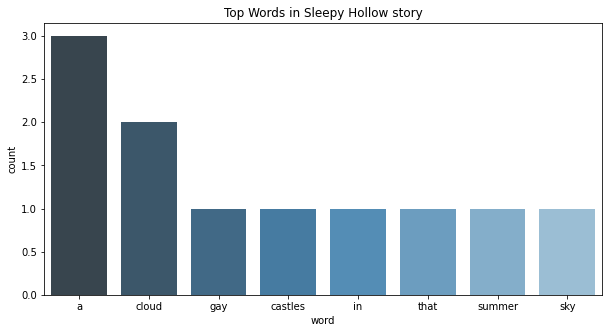

Text(0.5, 1.0, 'Top Words in Sleepy Hollow story')

In [0]:
# create plot (using matplotlib)
plt.figure(figsize=(10,5))
sns.barplot(xlabel, ylabel, data=df, palette="Blues_d").set_title(title)

In [0]:
pip install wordcloud #installing the wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
pip install nltk

Python interpreter will be restarted.
Requirement already satisfied: nltk in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (3.6.2)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (from nltk) (4.60.0)
Requirement already satisfied: click in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (from nltk) (7.1.2)
Requirement already satisfied: regex in /local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/lib/python3.8/site-packages (from nltk) (2021.4.4)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-818fb61a-a28d-47c2-b996-ebb26577bbb5/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import nltk
nltk.download('popular') 

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Package gutenberg is already up-to-date!
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Package inaugural is already up-to-date!
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package movie_reviews is already up-to-date!
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Package names is already up-to-date!
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Package shakespeare is already up-to-date!
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Package stopwords is already up-to-date!
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Package treebank is already up-to-date!
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package twitter_samples is already up-to-date!
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Package omw is already up-to-date!
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Package wordnet is already up-to-date!
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Package wordnet_ic is already up-to-date!
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Package words is already up-to-date!
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package maxent_ne_chunker is already up-to-date!
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Package punkt is already up-to-date!
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package snowball_data is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[1]: True

Preprocessed Data: project gutenberg ’ legend sleepy hollow , washington irving ebook use anyone anywhere cost almost restrictions whatsoever may copy , give away re-use terms project gutenberg license included ebook online www gutenberg org title : legend sleepy hollow author : washington irving posting date : june 25 , 2008 [ ebook # 41 ] release date : october , 1992 last updated : september 14 , 2016 language : english character set encoding : utf-8 * * * start project gutenberg ebook legend sleepy hollow * * * produced ilana ( kingsley ) newby greg newby legend sleepy hollow washington irving found among papers late diedrich knickerbocker pleasing land drowsy head , dreams wave half-shut eye ; gay castles clouds pass , forever flushing round summer sky castle indolence bosom one spacious coves indent eastern shore hudson , broad expansion river denominated ancient dutch navigators tappan zee , always prudently shortened sail implored protection st nicholas crossed , lies small market town rural port , called greensburgh , generally properly known name tarry town name given , told , former days , good housewives adjacent country , inveterate propensity husbands linger village tavern market days may , vouch fact , merely advert , sake precise authentic far village , perhaps two miles , little valley rather lap land among high hills , one quietest places whole world small brook glides , murmur enough lull one repose ; occasional whistle quail tapping woodpecker almost sound ever breaks upon uniform tranquillity recollect , stripling , first exploit squirrel-shooting grove tall walnut-trees shades one side valley wandered noontime , nature peculiarly quiet , startled roar gun , broke sabbath stillness around prolonged reverberated angry echoes ever wish retreat whither might steal world distractions , dream quietly away remnant troubled life , know none promising little valley listless repose place , peculiar character inhabitants , descendants original dutch settlers , sequestered glen long known name sleepy hollow , rustic lads called sleepy hollow boys throughout neighboring country drowsy , dreamy influence seems hang land , pervade atmosphere say place bewitched high german doctor , early days settlement ; others , old indian chief , prophet wizard tribe , held powwows country discovered master hendrick hudson certain , place still continues sway witching power , holds spell minds good people , causing walk continual reverie given kinds marvellous beliefs , subject trances visions , frequently see strange sights , hear music voices air whole neighborhood abounds local tales , haunted spots , twilight superstitions ; stars shoot meteors glare oftener across valley part country , nightmare , whole ninefold , seems make favorite scene gambols dominant spirit , however , haunts enchanted region , seems commander-in-chief powers air , apparition figure horseback , without head said ghost hessian trooper , whose head carried away cannon-ball , nameless battle revolutionary war , ever anon seen country folk hurrying along gloom night , wings wind haunts confined valley , extend times adjacent roads , especially vicinity church great distance indeed , certain authentic historians parts , careful collecting collating floating facts concerning spectre , allege body trooper buried churchyard , ghost rides forth scene battle nightly quest head , rushing speed sometimes passes along hollow , like midnight blast , owing belated , hurry get back churchyard daybreak general purport legendary superstition , furnished materials many wild story region shadows ; spectre known country firesides , name headless horseman sleepy hollow remarkable visionary propensity mentioned confined native inhabitants valley , unconsciously imbibed every one resides time however wide awake may entered sleepy region , sure , little time , inhale witching influence air , begin grow imaginative , dream dreams , see apparitions mention peaceful spot possible lau

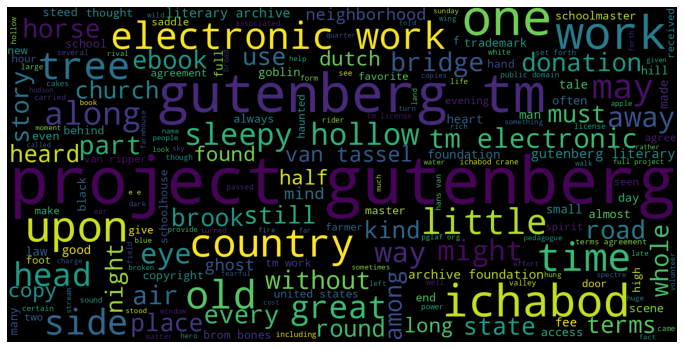

In [0]:
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

class WordCloudGeneration:
    def preprocessing(self, data):
        # convert all words to lowercase
        data = [item.lower() for item in data]
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = ' '.join(data)
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        print("\n Preprocessed Data: " ,preprocessed_data)
        return preprocessed_data

    def create_word_cloud(self, final_data):
        # initiate WordCloud object with parameters width, height, maximum font size and background color
        # call the generate method of WordCloud class to generate an image
        wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="black").generate(final_data)
        # plt the image generated by WordCloud class
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

wordcloud_generator = WordCloudGeneration()
# you may uncomment the following line to use custom input
# input_text = input("Enter the text here: ")
import urllib.request
url = "https://raw.githubusercontent.com/sowmyathogiti/Sowmya-FinalProject-BigData/main/TheLegendOfSleepyHollow.txt"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
input_text = response.read().decode('utf-8')
input_text = input_text.split('.')
clean_data = wordcloud_generator.preprocessing(input_text)
wordcloud_generator.create_word_cloud(clean_data)